**Rule**
- Open everything.
- No communication regarding exam. If you have question about clarification, send me a message via discord.
- You will be graded out of 360. (Yes there are 400 points available).

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy


# Bayes and Basic Probability (100)

Consider data given in mushroom.csv (taken from https://www.kaggle.com/uciml/mushroom-classification ) answers the following questions. Let us assume that this data is taken from a rain forest in Africa.

For all these questions you *may* **assume conditional independence**.

## Find

$$
P(gillsize=broad| edible)
$$

## Find

$$
P(edible|gillsize=broad)
$$

## Is this mushroom edible?
The probability that a mushroom that a mushroom with the property listed below found in Africa is edible.

- capshape == 'g'
- capsurface=='f
- capcolor=='g'
- bruises=='f'

and the rest of the featuers are not known.

Find the probability that this mushroom is edible.

Note: This may or may not be useful to you depending on how you do it. You can filter column of dataframe by doing ```df[['a', 'b', 'c']]``` note that the index is given by a list.


## Thailand Mushroom

You want to applied this data to thailand. However, the only thing you know about Thailand mushroom is that 90% of the mushroom found in Thailand is edible.

Consider a mushroom A with exactly the same properties with the previous question but we pick it up from a forest in Thailand. 

Find the probability mushroom A is edible using both the knowledge you learn from African mushroom and the fact that Thailand mushroom is 90% edible.


# Likelihood (100)

Consider a basket of 3 mangoes. But instead of tasting it like in class, we measure the sugar content instead.

The are of the following sugar content (g are grams unit)
13g, 14g, 15g.

There are two farms this time.

- Pavan's Farm that produces mangoes which sugar content is a normal distribution with mean 13g and std of 2gram.  
- Napat's Farm that produces mangoes which sugar content is a normal distribution with mean 15g and std of 1gram.

Answer the following questions. (you may ignore the combinatoric factor)

## Compute the likelihood of finding the three mangoes for Pavan's farm.

In [7]:
sugar_content = [13,14,15]
z_score = []
for x in sugar_content:
    z_score.append((x-13)/2) # mean = 13g , std = 2g

print(z_score) #Compare to z-table value to mango

mango_p=[0.5,0.6915,0.8413]

likelihood_p = 1
for i in mango_p:
    likelihood_p *= i

print(likelihood_p) # Pavan's farm likelihood

[0.0, 0.5, 1.0]
0.290879475


## Compute the likelihood of finding the three mangoes for Napat's farm.

In [9]:
z_score = []
for x in sugar_content:
    z_score.append((x-15)/1) # Mean = 15g, std = 1g

print(z_score) #Compare to z-table value to mango

mango_n =[0.02275,0.15866,0.5]

likelihood_n = 1
for i in mango_n:
    likelihood_n *= i

print(likelihood_n) # Napat's farm likelihood

[-2.0, -1.0, 0.0]
0.0018047574999999999


## If we have no clue.
If you have no idea about the total yearly production of each farm so you assume that they both produce the same amount. Which farm do these mangoes are more likely to come from?

#### **Answer** 
If we assume that they both produce the same amount, according to the likelihood value of both farm, these mangoes are more likely to come from **Pavan's farm**.

## If Napat has monopoly? 

If Napat is secretly an heir to a Multi-National Mango Coporate which holds a virtual monopoly over mango market. They produces 10Million mangoes a year. While Pavan's farm is an artisan organic fame that produces 100 mango a year.

Will this change the answer to the previous question? (Give a justifying calculation)

In [10]:
Napat = 10e8
Pavan = 100

total_mango = Napat + Pavan

p_napat = Napat / total_mango
p_pavan = Pavan / total_mango

print(p_napat)
print(p_pavan)

0.99999990000001
9.9999990000001e-08


#### **Answer**
Yes, since Napat can produce a lot mangoes more than Pavan, the probablity and the likelihood of 3 mangoes are almost absolutely from Napat's farm.

# Model Selection and Picking Cut (100)

## Consider the following regression with funny looking regularization.

$$
cost(w) = \sum (y^{(i)} - w \cdot x^{(i)})^2 + \frac{1}{C} \max_{j\ne0} |w_j|
$$

Will we over fit when $C>0$ is large or small. Explain your answer.

Note: $ \max_{j\ne0} |w_j| $ just give you the maximum element among all the component of w that is not the first one.

This also has a name it's called $L-infinity$ regularization

## Which one is the correct learning curve for the regularization above

### A 
(see A.png if the pic doesn't show up)
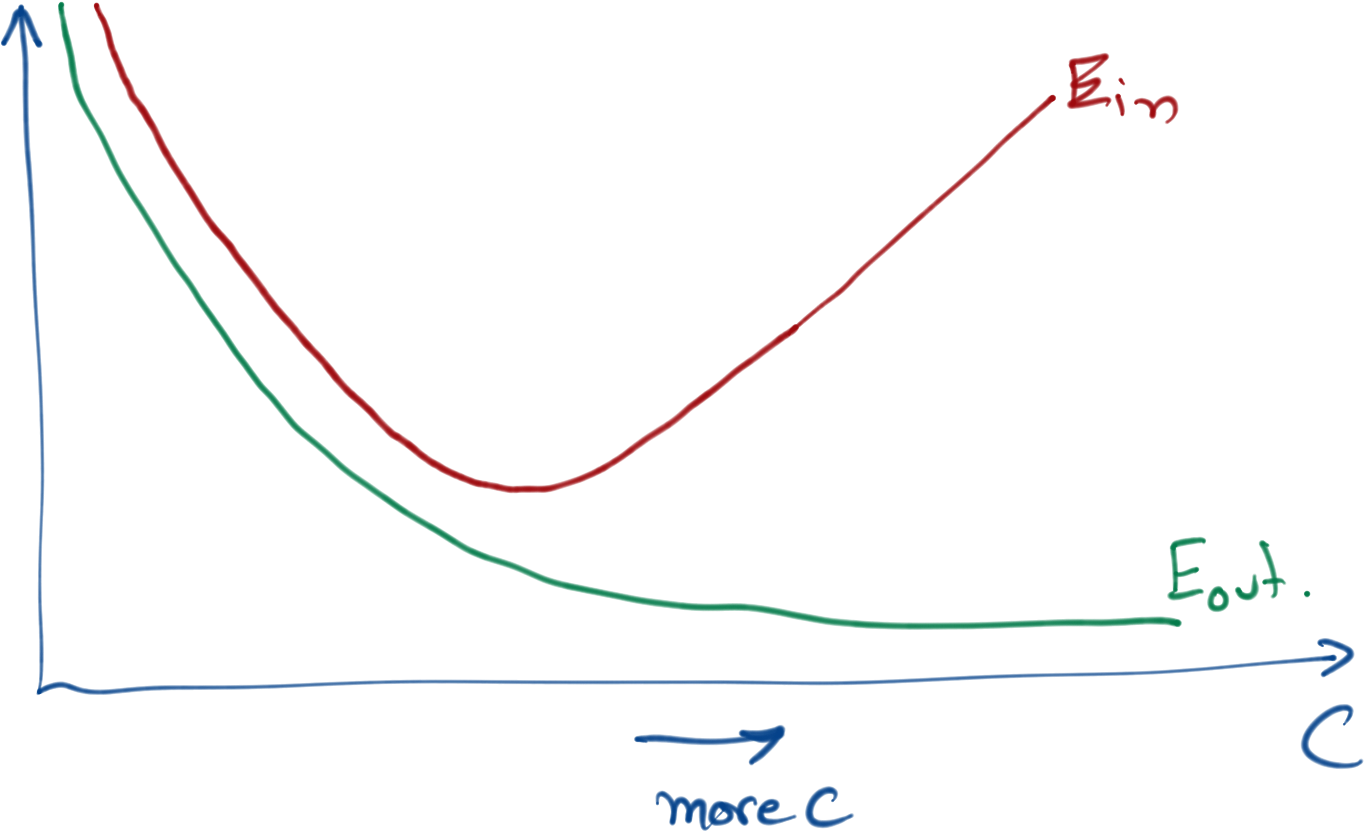

### B

see B.png if pic does not show up.
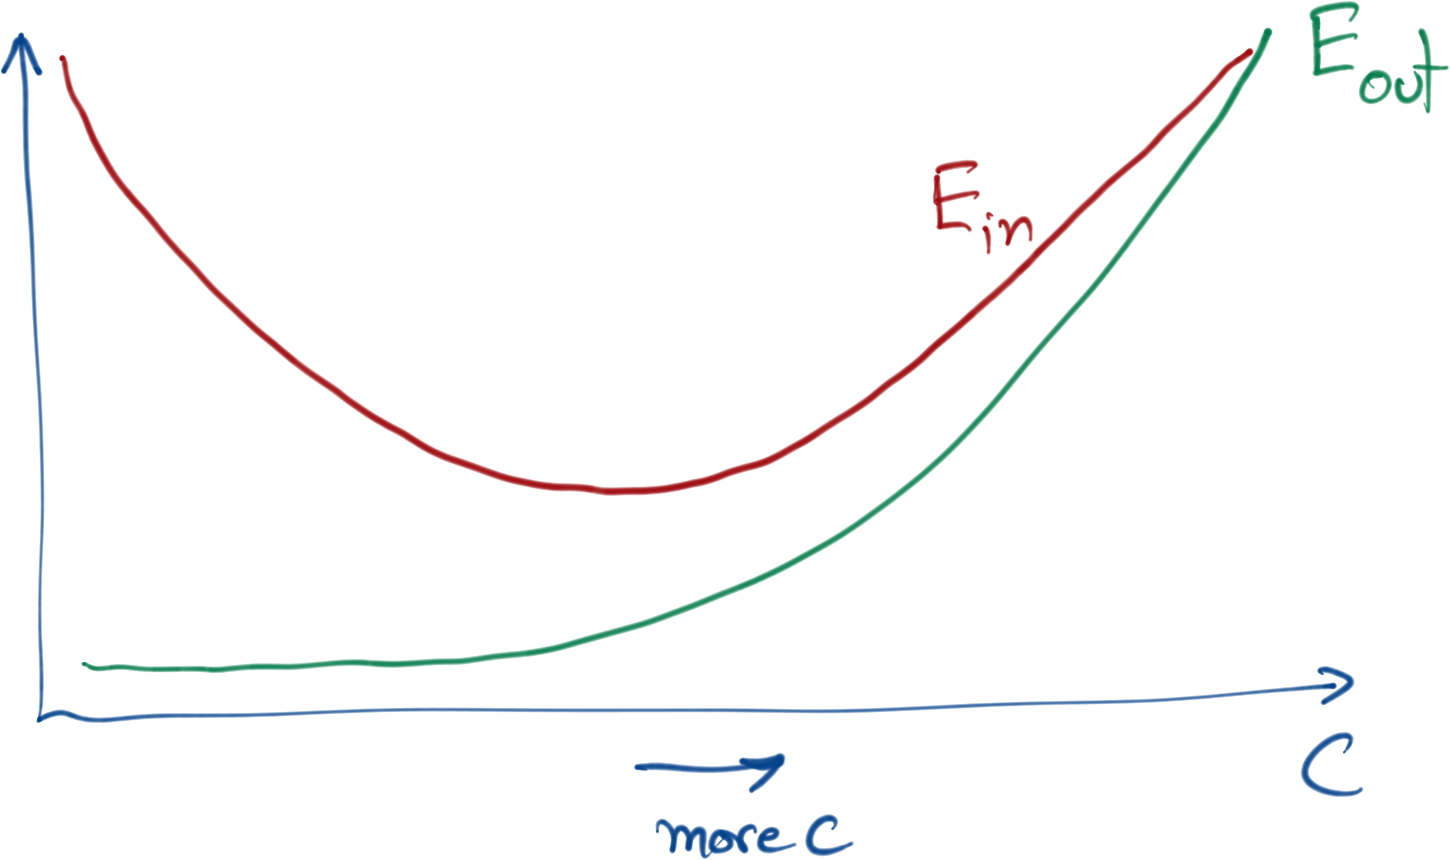

## ROC-ish

Read the axis label carefully. Which one is a better classifier given the following ROC curve?



Text(0, 0.5, 'True Negative Rate')

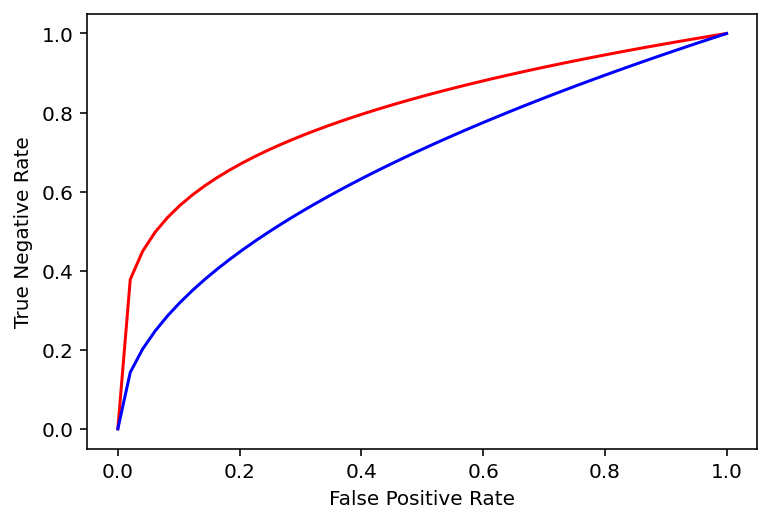

In [2]:
xs = np.linspace(0,1)
ys = np.sqrt(xs)
plt.plot(xs, np.sqrt(ys), color='red')
plt.plot(xs, ys, color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Negative Rate')

## Train Test Validation

In less than 200 words. (Shorter is better) Explain why do we need to separate data in to train test and validation set.

## Multiclass

If we were to train a multiclass classification model using **exhaustive matrix** to separate picture of Prayut, Prawit, and Anupong.
List all the classifier that you need to train and describe how each one should be trained (...VS...).

# Putting Things Together (100)

Consider the (unpadded) data given below.

This data is for a bank identification application in which the model is trying to identify the true owner of the account (positive, red) or not (negative, blue). But, no model is perfect; it does the wrong job sometime.

Plot to show your classification result.

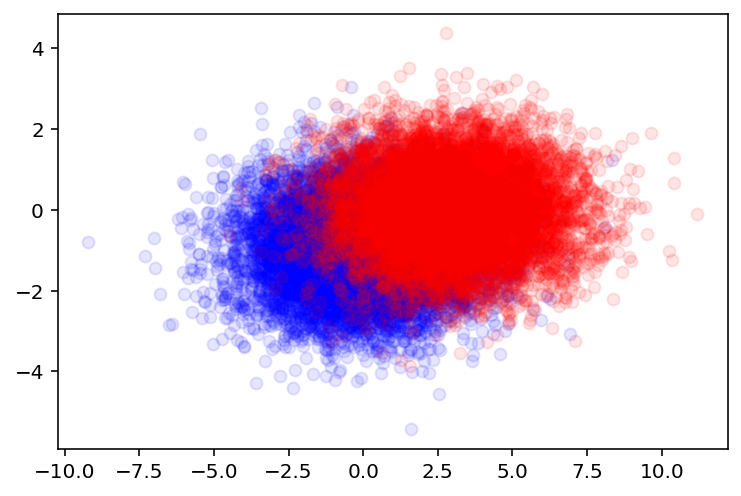

In [3]:
import numpy as np
from matplotlib import pyplot as plt
n = 10000
np.random.seed(3)
xp = np.random.randn(n) *2 + 3
yp = np.random.randn(n)

xn = np.random.randn(n) *2
yn = np.random.randn(n) - 1

xclasses = np.concatenate([np.ones(n), np.zeros(n)])

data = np.vstack([np.vstack([xp, yp]).T, np.vstack([xn, yn]).T])

plt.scatter(data[xclasses==0, 0], data[xclasses==0, 1], alpha=0.1, color='blue')
plt.scatter(data[xclasses==1, 0], data[xclasses==1, 1], alpha=0.1, color='red')


## Train a Linear Logistic model.
Train a logistic classifier. Then draw the 50% classification line. (no need to separate test train)

## Where should we place the probability cutoff?
For each false negative, you pay the customer 1$ for the annoyance it causes.

For each false positive, the 10$ will get stolen from the account.